# Train / Test

Simple polynomial regression, start by setting up some data:

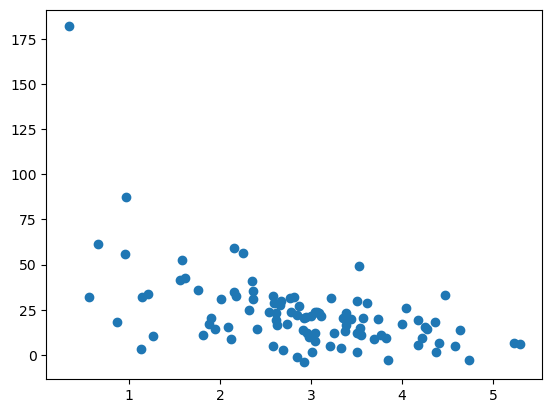

In [35]:
%matplotlib inline
import numpy as np
from pylab import *
import pandas as pd

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds


scatter(pageSpeeds, purchaseAmount)

Now split the data into training and testing datasets.

In [36]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(pageSpeeds, purchaseAmount, test_size=0.20, shuffle=True)

print("Shape of new dataframes - {} , {}".format(train_X.shape, test_X.shape))
print("Shape of new dataframes - {} , {}".format(train_Y.shape, test_Y.shape))

Shape of new dataframes - (80,) , (20,)
Shape of new dataframes - (80,) , (20,)


Here's our training dataset:

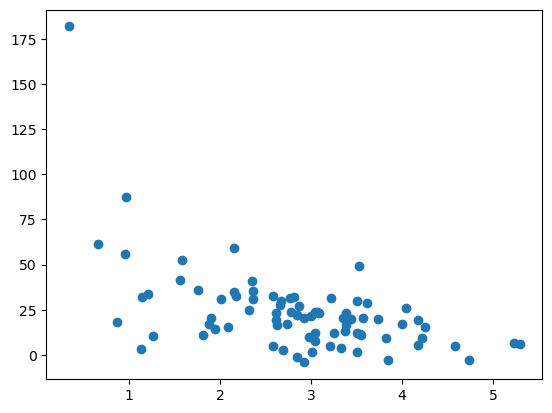

In [37]:
scatter(train_X, train_Y)

And our test dataset:

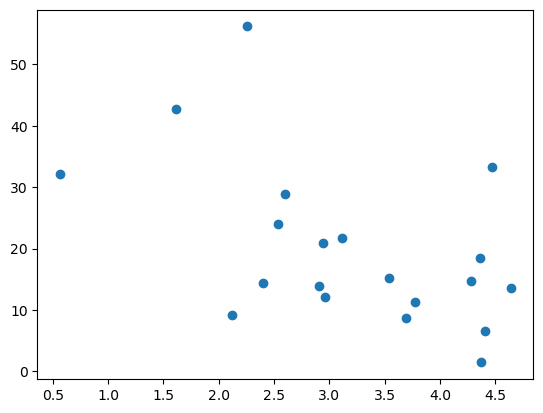

In [38]:
scatter(test_X, test_Y)

Now we'll try to fit an 8th-degree polynomial to this data (which is almost certainly overfitting, given what we know about how it was generated!)

In [45]:
x = np.array(train_X)
y = np.array(train_Y)

p4 = np.poly1d(np.polyfit(x, y, 8))

Let's plot our polynomial against the training data:

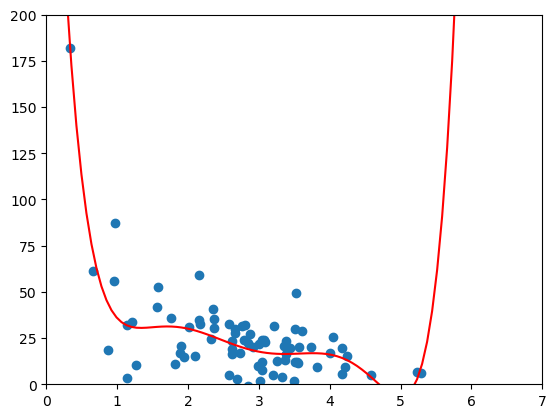

In [46]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()


And against our test data:

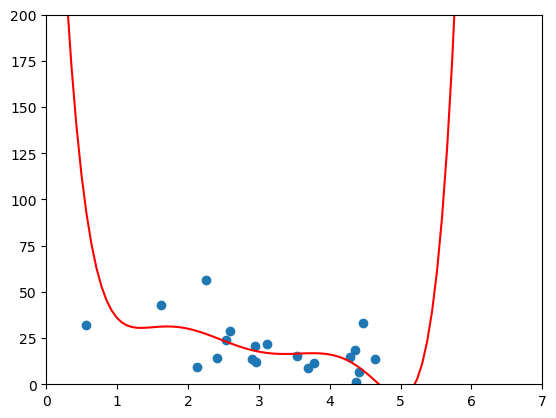

In [47]:
testx = np.array(test_X)
testy = np.array(test_Y)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

Doesn't look that bad when you just eyeball it, but the r-squared score on the test data is kind of horrible! This tells us that our model isn't all that great...

In [48]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))

print(r2)


-0.9042975795582426


...even though it fits the training data better:

In [49]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(train_Y), p4(np.array(train_X)))

print(r2)

0.6982808387314425


If you're working with a Pandas DataFrame (using tabular, labeled data,) scikit-learn has built-in train_test_split functions to make this easy to do.

Later we'll talk about even more robust forms of train/test, like K-fold cross-validation - where we try out multiple different splits of the data, to make sure we didn't just get lucky with where we split it.

## Try for a better fit

Adjusting to see different degree polynomial fits best.

In [78]:
p4 = np.poly1d(np.polyfit(x, y, 5))
r2 = r2_score(testy, p4(testx))

print(r2)

-1.2362499636864563


In [79]:
r2 = r2_score(np.array(train_Y), p4(np.array(train_X)))

print(r2)

0.6577014209083416


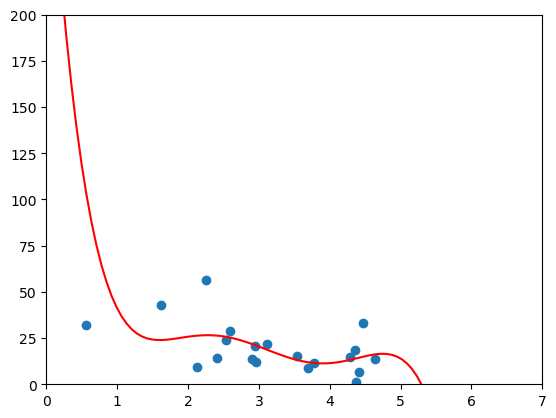

In [80]:
testx = np.array(test_X)
testy = np.array(test_Y)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

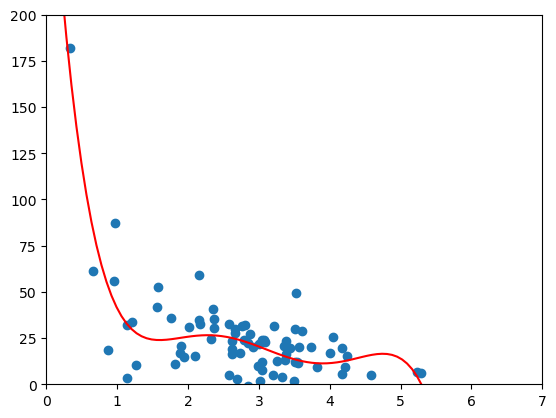

In [81]:
xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()


In [82]:
r2 = r2_score(np.array(train_Y), p4(np.array(train_X)))

print(r2)

0.6577014209083416


#### removing the outlier from the training dataset would improve this model